#   SERIGNE DAME GADIAGA MAM3 Polytech Lyon 2023/2024

# Titanic

Dans ce projet, nous utiliserons les données du Titanic, notamment l'âge, le sexe et la classe du billet, pour construire un modèle prédictif en utilisant l'ensemble 'train.csv'. Ensuite, ce modèle sera appliqué aux données de test pour anticiper la survie des passagers. Notre objectif ultime est de soumettre ces prédictions à Kaggle, suivant le format du fichier 'gender_submission.csv', afin de mieux comprendre les facteurs qui ont influencé le destin des passagers à bord du Titanic

En premier lieu nous importons les bibliothèques afin d'exploiter toutes les données et de les représenter.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing as pp
from sklearn.metrics import roc_curve, auc
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Étude des Données du fichier Train

In [2]:
train = pd.read_csv('train.csv');
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Determination du taille de la dataframe et sa description.

In [3]:
print(train.shape)

(891, 12)


In [4]:
for col in train.columns:
    print(col, " : ", train[col].unique())

PassengerId  :  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 24

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Vérification des données manquantes.

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Étant donné que des données tels que l'Age, la cabines et le porte d'embarquement de certain passagers sont manquantes, nous remplacons les valeurs manquantes dans les colonnes par respectivement leurs médianes et la valeur modale respective, tout en remplaçant les valeurs manquantes dans la colonne 'Cabin' par 'Unknown'.

In [7]:
age_median = train['Age'].median()
train['Age'].fillna(age_median, inplace=True)
train['Cabin'].fillna('Unknown', inplace=True)
most_common_port = train['Embarked'].mode()[0]
train['Embarked'].fillna(most_common_port, inplace=True)
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Après avoir remplacé toutes les données, nous génèrons un tableau croisé et un graphe représentatif en utilisant les données du DataFrame 'train' pour analyser la relation entre les variables 'Survived' (survécu ou non), 'Sex' (sexe) et 'Pclass' (classe du billet ).

In [8]:
cross_table = pd.crosstab(index=train['Survived'], columns=[train['Sex'], train['Pclass']], normalize='columns')
print(cross_table)

Sex         female                     male                    
Pclass           1         2    3         1         2         3
Survived                                                       
0         0.031915  0.078947  0.5  0.631148  0.842593  0.864553
1         0.968085  0.921053  0.5  0.368852  0.157407  0.135447


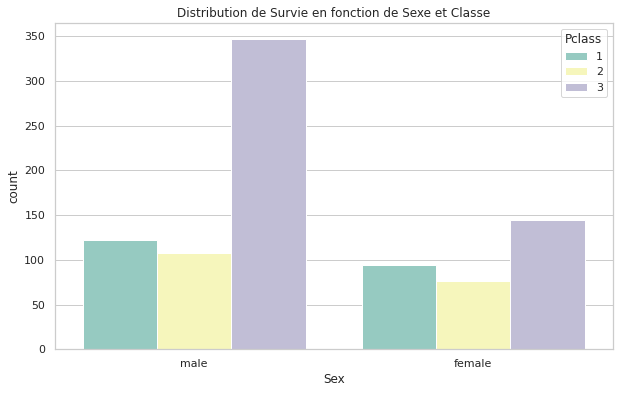

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x="Sex", hue="Pclass", hue_order=[1, 2, 3], palette="Set3", dodge=True)
plt.title("Distribution de Survie en fonction de Sexe et Classe")
plt.show()

Maintenant, nous tracons la répartition des survivants par rapport à chaque variable pour voir de manière plus générale la courbe la plus explicative.

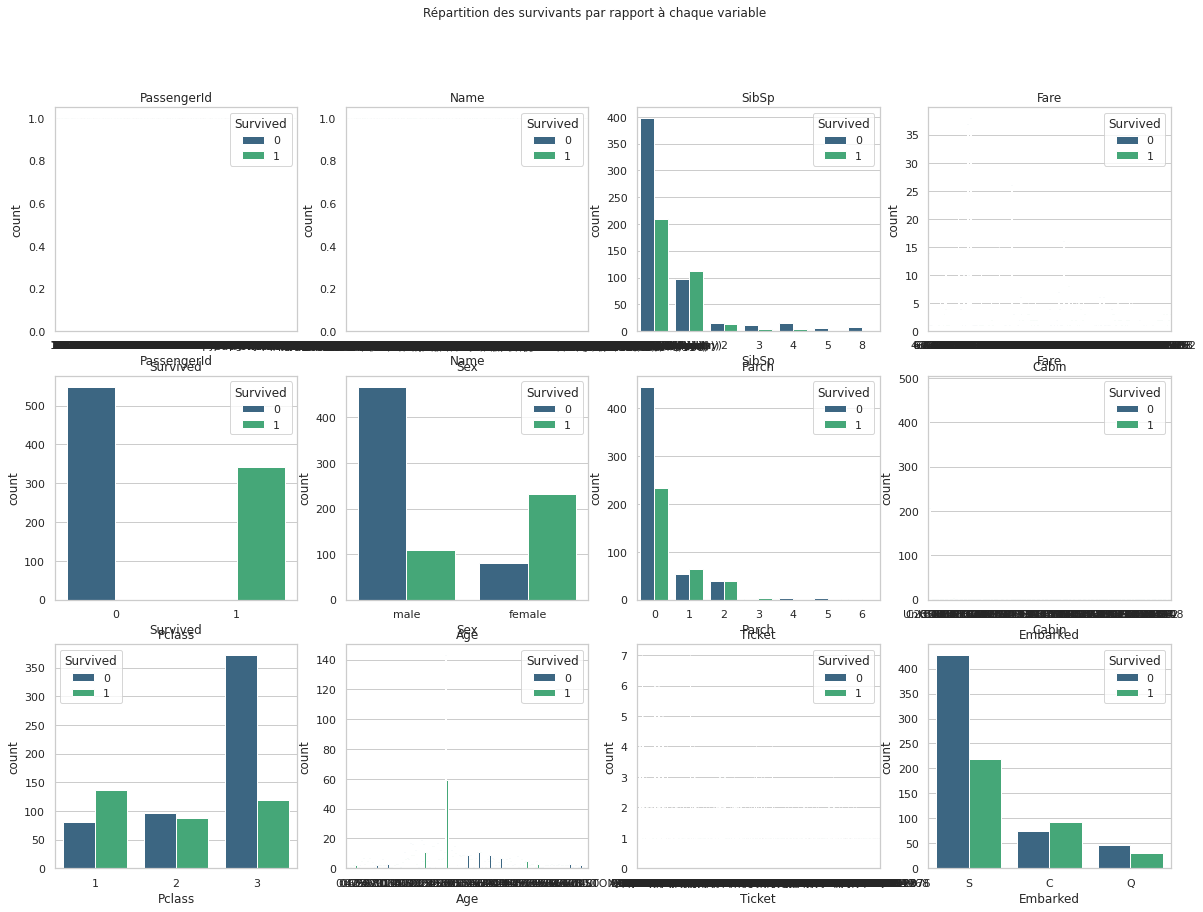

In [10]:
names = train.columns
fig, axes = plt.subplots(3, 4, figsize=(20, 14))
fig.suptitle('Répartition des survivants par rapport à chaque variable')
for i in range(0, 3, 1):
    for j in range(0, 4, 1):
        col_idx = i + j * 3 
        if col_idx < len(names):
            ax = sns.countplot(data=train, x=names[col_idx], hue='Survived', palette='viridis', ax=axes[i, j])
            ax.set(title=names[col_idx])
plt.show()

le graphe de la répartition des survivants par rapport au Sex est tre explicatif. Nous le prenons faire notre étude.

[Text(0.5, 1.0, 'Répartition des survivants par rapport au Sex')]

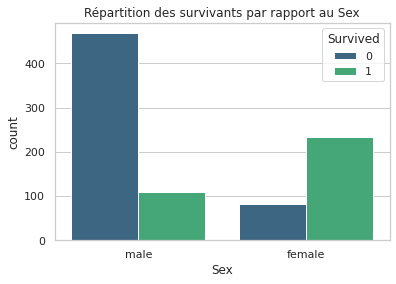

In [11]:
sns.countplot(data=train, x='Sex', hue='Survived', palette='viridis').set(title='Répartition des survivants par rapport au Sex')

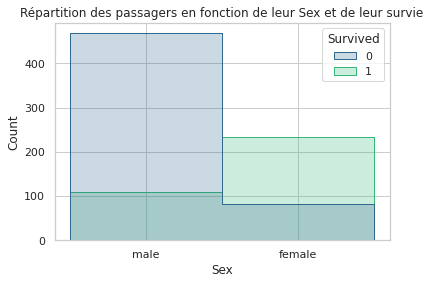

In [12]:
sns.histplot(data=train, x='Sex', hue='Survived', element='step', common_norm=False, palette='viridis')
plt.title('Répartition des passagers en fonction de leur Sex et de leur survie')
plt.xlabel('Sex')
plt.show()

# Encodage et corrélation

Ici, on convertit les données catégorielles en données numériques pour les préparer à l'entraînement de modèles d'apprentissage automatique qui requièrent des données numériques en entrée.

In [13]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
for i in train.columns:
    train[i] = la.fit_transform(train[i])

On calcule la corrélation entre la variable cible 'Survived' et les autres variables du DataFrame 'train' pour obtenir une matrice de corrélation. Ensuite, on trie ces corrélations de manière décroissante. Le résultat, stocké dans la variable 'rela', montre la force et la direction de la corrélation entre la variable 'Survived' et toutes les autres variables. Cela nous permet d'identifier les caractéristiques qui sont les plus fortement corrélées avec la survie, ce qui peut nous être utile pour la sélection de caractéristiques ou l'analyse des facteurs qui influencent la variable cible 'Survived' dans le contexte de l'analyse de données ou de l'apprentissage automatique.

In [14]:
cor = train.corr()
rela = cor['Survived'].sort_values(ascending=False)
rela

Survived       1.000000
Fare           0.333943
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.026385
Name          -0.057343
Age           -0.058003
Ticket        -0.164549
Embarked      -0.167675
Cabin         -0.254888
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

Similaire au précédent, mais là, on calcule la corrélation entre la variable 'Age' et les autres variables du DataFrame 'train'.

In [18]:
cor = train.corr()
rela = cor['Age'].sort_values(ascending=False)
rela

Age            1.000000
Fare           0.131373
Sex            0.075713
Name           0.046383
PassengerId    0.034492
Embarked      -0.014086
Survived      -0.058003
Ticket        -0.073139
Parch         -0.158665
Cabin         -0.241036
SibSp         -0.245214
Pclass        -0.346194
Name: Age, dtype: float64

In [15]:
cor

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034492,-0.065229,-0.001652,-0.056554,-0.006390,-0.035077,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.058003,-0.026385,0.081629,-0.164549,0.333943,-0.254888,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.346194,0.078141,0.018443,0.319869,-0.724119,0.684121,0.162098
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.046383,-0.035535,-0.049105,0.047348,-0.053846,0.061959,-0.006117
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.075713,-0.123164,-0.245489,0.059372,-0.265389,0.096681,0.108262
Age,0.034492,-0.058003,-0.346194,0.046383,0.075713,1.000000,-0.245214,-0.158665,-0.073139,0.131373,-0.241036,-0.014086
SibSp,-0.065229,-0.026385,0.078141,-0.035535,-0.123164,-0.245214,1.000000,0.423338,0.069238,0.368688,0.040729,0.065635
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.158665,0.423338,1.000000,0.020003,0.361243,-0.028324,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.073139,0.069238,0.020003,1.000000,-0.168153,0.243696,-0.001729
Fare,-0.006390,0.333943,-0.724119,-0.053846,-0.265389,0.131373,0.368688,0.361243,-0.168153,1.000000,-0.540116,-0.158036


Représentation de la matrice de Corrélation 

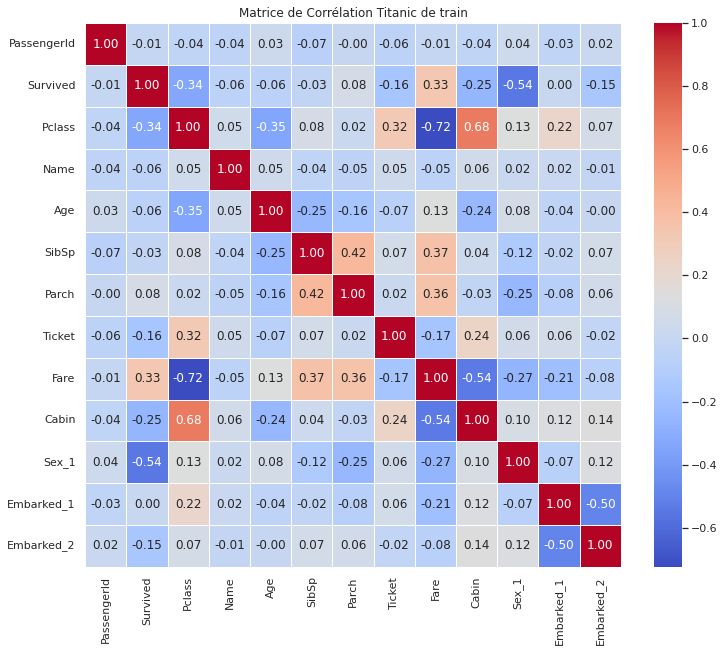

In [43]:
correlation_matrix = train.corr()
plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de Corrélation Titanic de train")
plt.show()

# Étude des données du fichier Test

Répartition des survivants et des non-survivants, ainsi que la répartition par sexe parmi les passagers

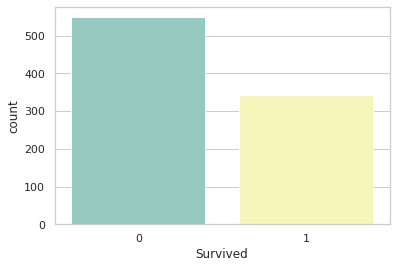

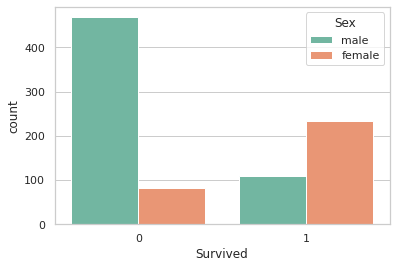

In [21]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sns.set(style="whitegrid")
sns.countplot(x="Survived", data=train_data, palette="Set3")
plt.show()
sns.set(style="whitegrid")
sns.countplot(x="Survived", hue="Sex", data=train_data, palette="Set2")
plt.show()

Comme on la fait ci-dessus, on prépare les données en remplissant les valeurs manquantes, convertit les variables catégorielles en variables numériques, puis divise les données en ensembles d'entraînement et de test. Ensuite, il forme un modèle d'ensemble de forêts aléatoires sur les données d'entraînement, évalue sa performance et génère des prédictions pour la survie des passagers sur un ensemble de test, prêt à être soumis pour une compétition ou une évaluation.

En même temps, on calcule l'accuracy, la preduction, la matrice de confusion, on représente la correlation et en fin on le sauvegarde dans le fichier Gender submission.

In [17]:
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
test_data["Age"].fillna(test_data["Age"].median(), inplace=True)
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)
train_data = pd.get_dummies(train_data, columns=["Sex", "Embarked"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Sex", "Embarked"], drop_first=True)
features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_male", "Embarked_Q", "Embarked_S"]
X = train_data[features]
y = train_data["Survived"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
X_final = test_data[features]
final_predictions = model.predict(X_final)
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": final_predictions
})
submission.to_csv("titanic_submission.csv", index=False)

Accuracy: 0.8212290502793296
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
 [[91 14]
 [18 56]]


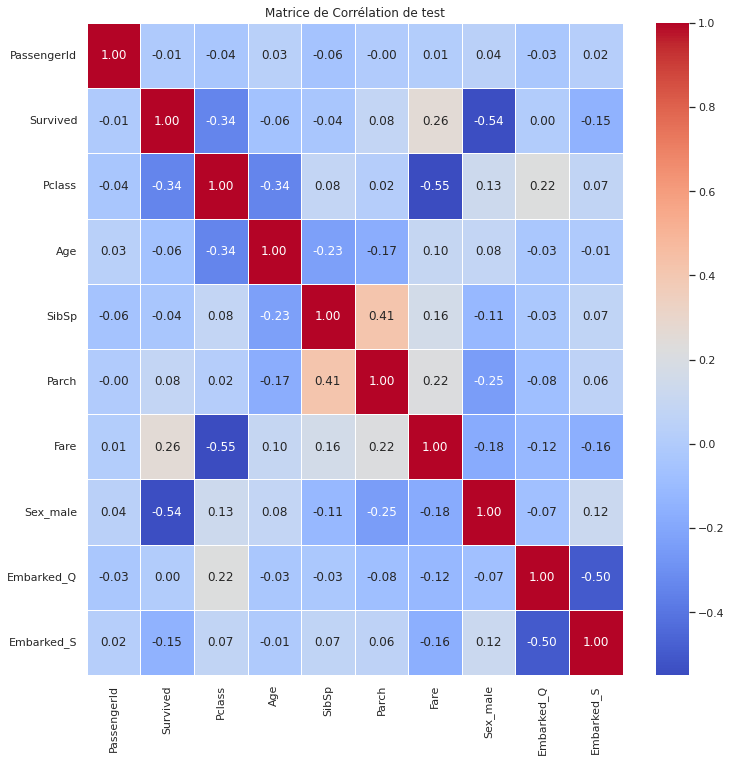

In [19]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 12))
ax = plt.gca()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, ax=ax)
plt.title("Matrice de Corrélation de test")
plt.show()

In [20]:
predictions = ...
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"], 
    "Survived": predictions  
})
submission.to_csv("gender_submission.csv", index=False)